# Statistics for Data Analystics: CA2
* Name - Anish Rao
* Student number - 20066423
* Course - B9DA101
* Group C    

# Setup

In [1]:
install.packages("caret")
install.packages("dplyr")
install.packages("forecast")
install.packages("ggplot2")
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(caret)
library(dplyr)
library(forecast)
library(ggplot2)
library(tseries)
set.seed(86)

data("mtcars")
head(mtcars)
str(mtcars)
summary(mtcars)

data("EuStockMarkets")
head(EuStockMarkets)
str(EuStockMarkets)
summary(EuStockMarkets)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

,DAX,SMI,CAC,FTSE
1991.496,1628.75,1678.1,1772.8,2443.6
1991.500,1613.63,1688.5,1750.5,2460.2
1991.504,1606.51,1678.6,1718.0,2448.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.512,1618.16,1686.6,1723.1,2484.7
1991.515,1610.61,1671.6,1714.3,2466.8


 Time-Series [1:1860, 1:4] from 1991 to 1999: 1629 1614 1607 1621 1618 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "DAX" "SMI" "CAC" "FTSE"


      DAX            SMI            CAC            FTSE     
 Min.   :1402   Min.   :1587   Min.   :1611   Min.   :2281  
 1st Qu.:1744   1st Qu.:2166   1st Qu.:1875   1st Qu.:2843  
 Median :2141   Median :2796   Median :1992   Median :3247  
 Mean   :2531   Mean   :3376   Mean   :2228   Mean   :3566  
 3rd Qu.:2722   3rd Qu.:3812   3rd Qu.:2274   3rd Qu.:3994  
 Max.   :6186   Max.   :8412   Max.   :4388   Max.   :6179  

# QUESTION 1
## Consider a relational dataset and specify your input and output variables.

### a) Train the model using 80% of this dataset and suggest an appropriate GLM to model ouput to input variables.

In [3]:
mtcars$am = as.factor(mtcars$am)
mtcars$cyl = as.factor(mtcars$cyl)

data_split = createDataPartition(mtcars$am, p = 0.8, list = FALSE)
train_data = mtcars[data_split, ]
test_data = mtcars[-data_split, ]

model = glm(am ~ mpg + hp + wt + cyl, data = train_data, family = binomial)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


### b) Specify the significant variables on the output variable at the level of 𝛼=0.05 and explore the related hypotheses test. Estimate the parameters of your model.

In [4]:
summary(model)


Call:
glm(formula = am ~ mpg + hp + wt + cyl, family = binomial, data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)  -1280.950 809723.749  -0.002    0.999
mpg             40.998  28196.890   0.001    0.999
hp               6.413   3310.121   0.002    0.998
wt             -98.671  58606.465  -0.002    0.999
cyl6            -5.707  30697.754   0.000    1.000
cyl8          -480.280 345022.729  -0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3.6499e+01  on 26  degrees of freedom
Residual deviance: 7.3221e-09  on 21  degrees of freedom
AIC: 12

Number of Fisher Scoring iterations: 25


### c) Predict the output of the test dataset using the trained model. Provide the functional form of the optimal predictive model.

In [5]:
predicted_prob = predict(model, newdata = test_data, type = "response")

predicted_class = ifelse(predicted_prob > 0.5, 1, 0)
actual_class = test_data$am

print(data.frame(Actual = actual_class, Predicted = predicted_class))

                 Actual Predicted
Mazda RX4 Wag         1         0
Duster 360            0         1
Merc 280C             0         0
Dodge Challenger      0         0
Porsche 914-2         1         1


### d) Provide the confusion matrix and obtain the probability of correctness of predictions.

In [6]:
predicted_class = as.factor(predicted_class)
actual_class = as.factor(actual_class)

confusion_matrix = confusionMatrix(predicted_class, actual_class)

print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 2 1
         1 1 1
                                          
               Accuracy : 0.6             
                 95% CI : (0.1466, 0.9473)
    No Information Rate : 0.6             
    P-Value [Acc > NIR] : 0.6826          
                                          
                  Kappa : 0.1667          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.6667          
            Specificity : 0.5000          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.5000          
             Prevalence : 0.6000          
         Detection Rate : 0.4000          
   Detection Prevalence : 0.6000          
      Balanced Accuracy : 0.5833          
                                          
       'Positive' Class : 0               
                                          

# QUESTION 2
## Let x_1,…,x_10 are identically independently distributed (iid) with Poisson (λ)

### a) Compute the likelihood function (LF).

 [1] 4 4 2 1 4 5 1 3 3 3


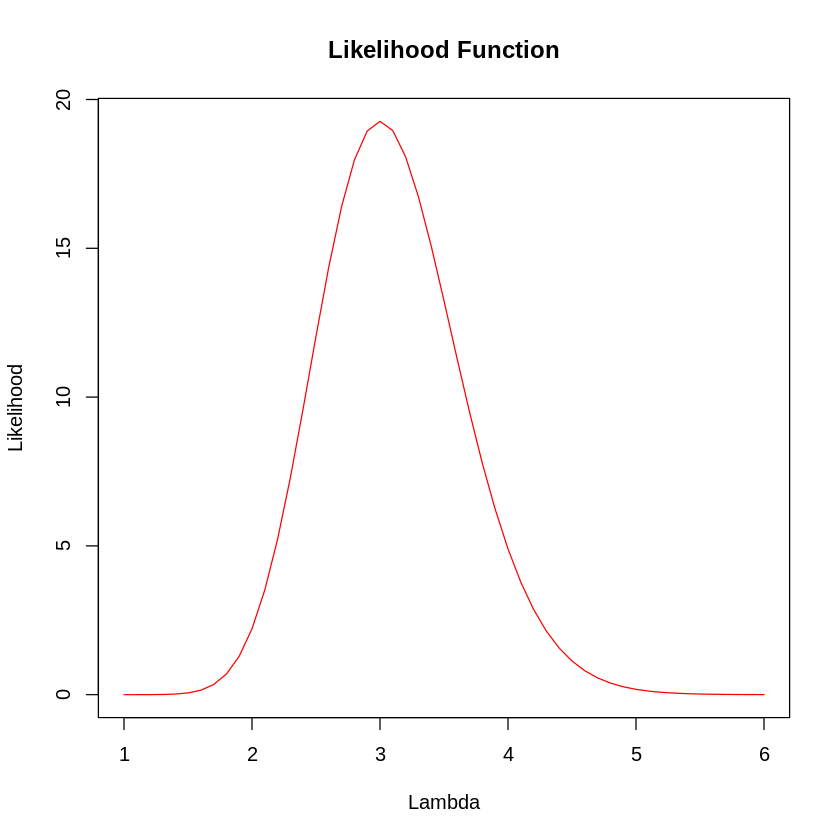

In [7]:
x = rpois(10, lambda = 3)
print(x)

likelihood = function(lambda, data) {
  n = length(data)
  sum_x = sum(data)
  return((lambda ^ sum_x) * exp(-n * lambda))
}

lambda_values = seq(1, 6, by = 0.1)
likelihood_values = sapply(lambda_values, likelihood, data = x)

plot(lambda_values, likelihood_values,
     type = "l",
     col = "red",
     main = "Likelihood Function",
     xlab = "Lambda", ylab = "Likelihood")

### b) Adopt the appropriate conjugate prior to the parameter λ.
(Hint: Choose hyperparameters optionally within the support of distribution)

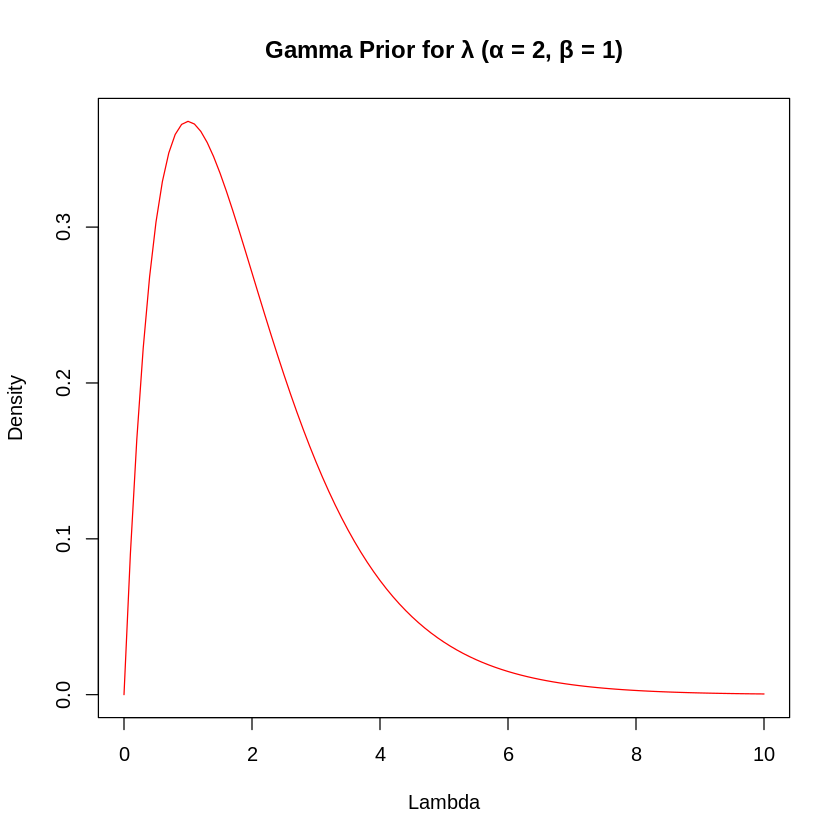

In [8]:
alpha = 2
beta = 1
lambda_vals = seq(0, 10, by = 0.1)

prior_density = dgamma(lambda_vals, shape = alpha, rate = beta)

plot(lambda_vals, prior_density,
     type = "l",
     col = "red",
     main = "Gamma Prior for λ (α = 2, β = 1)",
     xlab = "Lambda", ylab = "Density")

### c) Using (a) and (b), find the posterior distribution of λ.

---



In [9]:
sum_x = sum(x)
n = length(x)

post_alpha = alpha + sum_x
post_beta = beta + n

cat("Posterior: Gamma(", post_alpha, ",", post_beta, ")\n")

Posterior: Gamma( 32 , 11 )


### d) Using (a) and (b), find the posterior distribution of λ.

In [10]:
lambda_bayes = post_alpha / post_beta

cat("Bayesian Estimator of λ:", lambda_bayes, "\n")

Bayesian Estimator of λ: 2.909091 


# Question 3
## Use a particular stock market dataset and apply the following steps to accomplish the time series analysis

### a) Check whether the time series is stationary in mean and variance.


	Augmented Dickey-Fuller Test

data:  dax
Dickey-Fuller = -0.82073, Lag order = 12, p-value = 0.9598
alternative hypothesis: stationary

Full SD: 1084.793 
First Half SD: 241.1517 
Second Half SD: 1137.395 


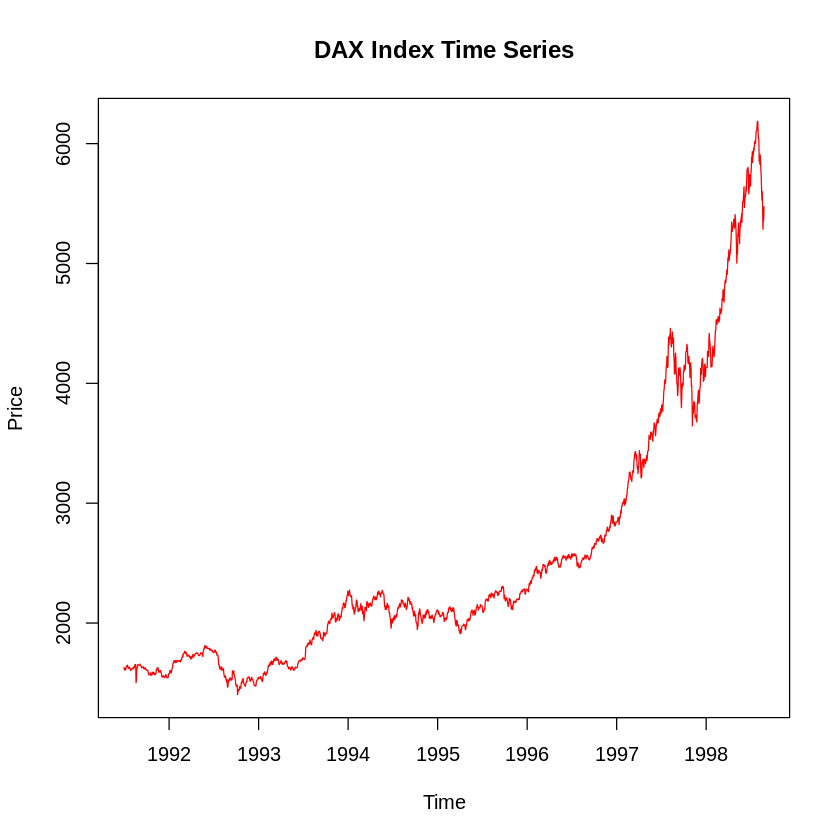

In [11]:
dax = EuStockMarkets[, "DAX"]

plot(dax,
     type = "l",
     col = "red",
     main = "DAX Index Time Series",
     xlab = "Time", ylab = "Price")

adf_result = adf.test(dax)
print(adf_result)

sd_full = sd(dax)
sd_first_half = sd(dax[1:(length(dax)/2)])
sd_second_half = sd(dax[((length(dax)/2) + 1):length(dax)])

cat("Full SD:", sd_full, "\n")
cat("First Half SD:", sd_first_half, "\n")
cat("Second Half SD:", sd_second_half, "\n")

### b) Use acf() and pacf() functions to identify the order of AR and MA.

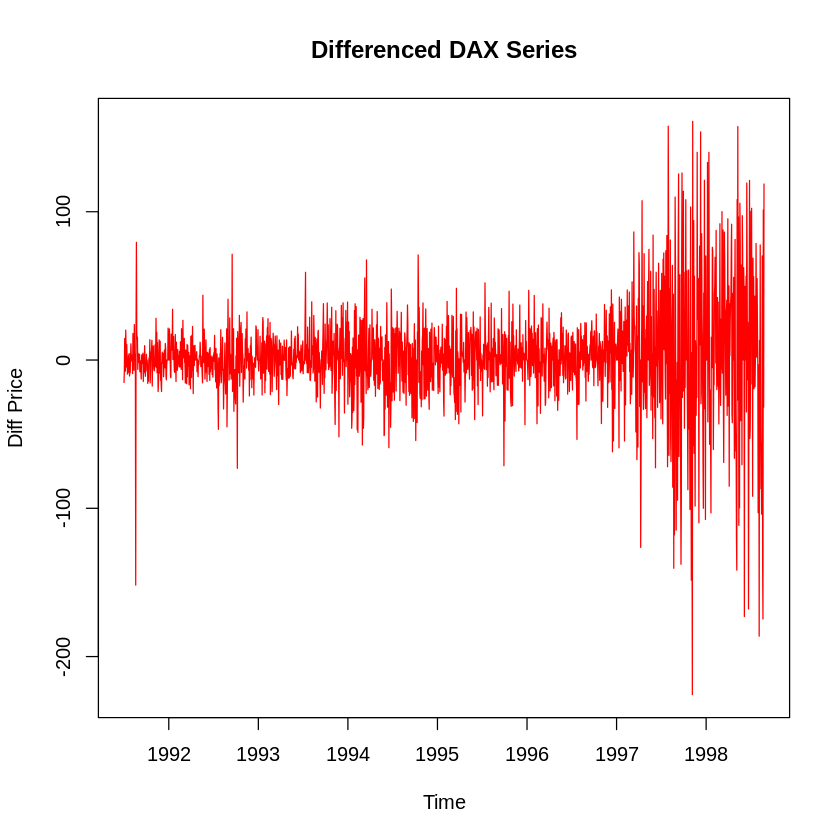

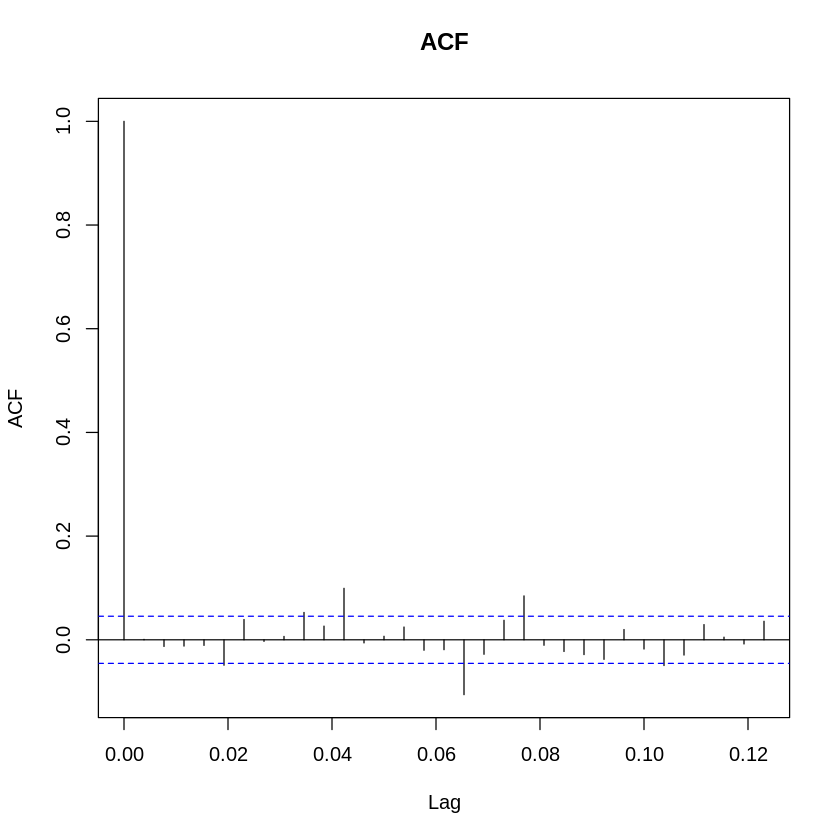

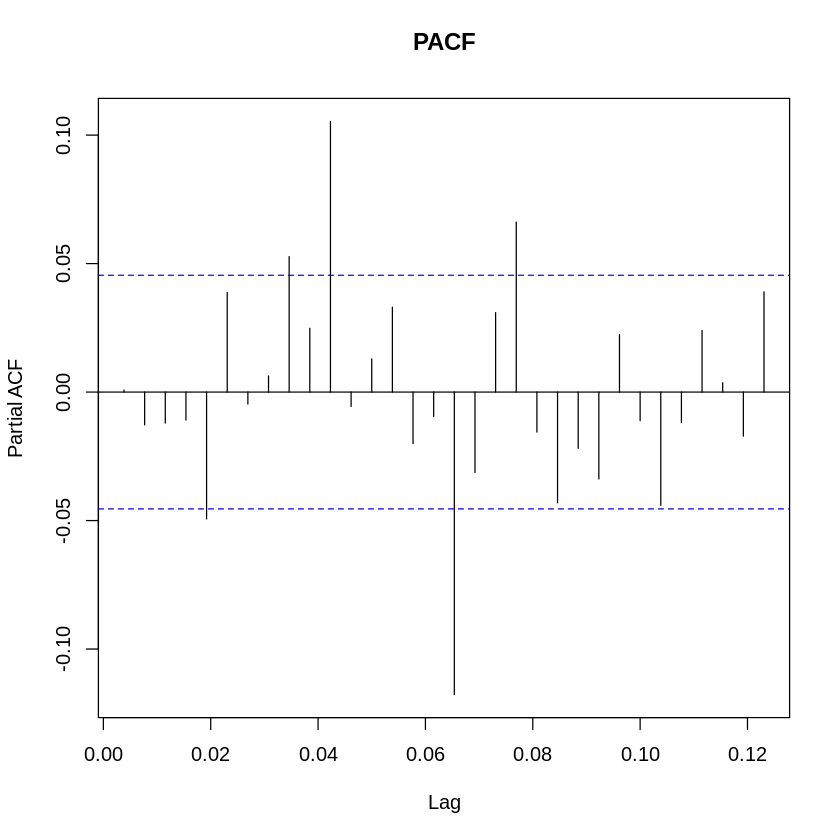

In [12]:
dax_diff = diff(dax)

plot(dax_diff,
     type = "l",
     col = "red",
     main = "Differenced DAX Series",
     xlab = "Time", ylab = "Diff Price")

acf(dax_diff, main = "ACF")

pacf(dax_diff, main = "PACF")

### c) Use auto.arima() to learn the best ARIMA model.

In [13]:
best_model = auto.arima(dax)
print(best_model)

Series: dax 
ARIMA(5,2,0) 

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.8187  -0.6631  -0.5053  -0.3444  -0.2231
s.e.   0.0228   0.0287   0.0306   0.0289   0.0231

sigma^2 = 1235:  log likelihood = -9248
AIC=18507.99   AICc=18508.04   BIC=18541.15


### d) Forecast h=10 step ahead prediction of the time series variable and plot it with the original time series.

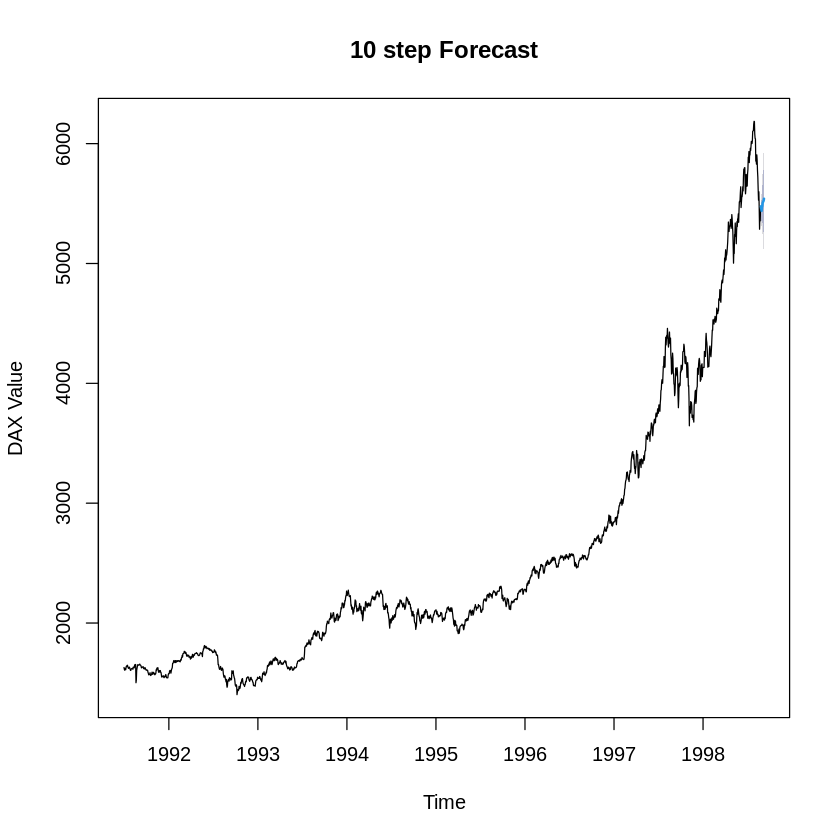

In [14]:
forecast_result = forecast(best_model, h = 10)

plot(forecast_result,
     main = "10 step Forecast",
     xlab = "Time", ylab = "DAX Value")